This examples covers the callable methods of the Python AWIPS DAF when working with gridded data.  We start with a connection to an EDEX server, then query data types, then grid names, parameters, levels, and other information. Finally the gridded data is plotted for its domain using Matplotlib and Cartopy.

### DataAccessLayer.changeEDEXHost()

After DataAccessLayer is imported from the package `awips.dataaccess`, the first step is to define the EDEX data server hostname (`edex-cloud.unidata.ucar.edu` for these examples)



In [1]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

### DataAccessLayer.getSupportedDatatypes()

getSupportedDatatypes() returns a list of available data types offered by the EDEX server defined above. 

In [2]:
dataTypes = DataAccessLayer.getSupportedDatatypes()
list(dataTypes)

['acars',
 'airep',
 'binlightning',
 'bufrmosavn',
 'bufrmoseta',
 'bufrmosgfs',
 'bufrmoshpc',
 'bufrmoslamp',
 'bufrmosmrf',
 'bufrua',
 'climate',
 'common_obs_spatial',
 'ffmp',
 'gfe',
 'grid',
 'hydro',
 'ldadmesonet',
 'maps',
 'modelsounding',
 'obs',
 'pirep',
 'practicewarning',
 'profiler',
 'radar',
 'radar_spatial',
 'satellite',
 'sfcobs',
 'topo',
 'warning']

### DataAccessLayer.newDataRequest()

Now create a new data request, and set the data type to **grid** and "locationName" to **RAP40** with **setDataType()** and **setLocationNames()**

In [3]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

### DataAccessLayer.getAvailableLocationNames()

With datatype set to "grid", we can query all available grid names with **getAvailableLocationNames()**

In [4]:
available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
list(available_grids)

['CMC',
 'DGEX',
 'ESTOFS',
 'ETSS',
 'FFG-ALR',
 'FFG-FWR',
 'FFG-KRF',
 'FFG-MSR',
 'FFG-ORN',
 'FFG-PTR',
 'FFG-RHA',
 'FFG-RSA',
 'FFG-STR',
 'FFG-TAR',
 'FFG-TIR',
 'FFG-TUA',
 'FNMOC-FAROP',
 'FNMOC-NCODA',
 'FNMOC-WW3',
 'GFS',
 'GFS20',
 'GribModel:7:14:108',
 'HFR-EAST_6KM',
 'HFR-EAST_PR_6KM',
 'HFR-US_EAST_DELAWARE_1KM',
 'HFR-US_EAST_FLORIDA_2KM',
 'HFR-US_EAST_NORTH_2KM',
 'HFR-US_EAST_SOUTH_2KM',
 'HFR-US_EAST_VIRGINIA_1KM',
 'HFR-US_HAWAII_1KM',
 'HFR-US_HAWAII_2KM',
 'HFR-US_HAWAII_6KM',
 'HFR-US_WEST_500M',
 'HFR-US_WEST_CENCAL_2KM',
 'HFR-US_WEST_LOSANGELES_1KM',
 'HFR-US_WEST_LOSOSOS_1KM',
 'HFR-US_WEST_NORTH_2KM',
 'HFR-US_WEST_SANFRAN_1KM',
 'HFR-US_WEST_SOCAL_2KM',
 'HFR-US_WEST_WASHINGTON_1KM',
 'HFR-WEST_6KM',
 'HPCGuide',
 'HPCqpf',
 'HPCqpfNDFD',
 'HRRR',
 'LAMP2p5',
 'MOSGuide',
 'MOSGuideExtended',
 'MRMS_0500',
 'MRMS_1000',
 'NAM12',
 'NAM40',
 'NAVGEM',
 'NCWF',
 'NOHRSC-SNOW',
 'NamDNG',
 'QPE-ALR',
 'QPE-FWR',
 'QPE-KRF',
 'QPE-MSR',
 'QPE-ORN',
 'QPE-T

### Set grid name with `setLocationNames()`

In [5]:
request.setLocationNames("RAP13")

# List Available Parameters for a Grid

### DataAccessLayer.getAvailableParameters()

After datatype and model name (locationName) are set, you can query all available parameters with **getAvailableParameters()**

In [6]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
list(availableParms)

['BLI',
 'CAPE',
 'CFRZR',
 'CICEP',
 'CIn',
 'CP1hr',
 'CRAIN',
 'CSNOW',
 'GH',
 'HPBL',
 'Heli',
 'LgSP1hr',
 'MMSP',
 'P',
 'PR',
 'PVV',
 'PW',
 'REFC',
 'RH',
 'SLI',
 'SnD',
 'T',
 'USTM',
 'VSTM',
 'Vis',
 'WEASD',
 'WEASD1hr',
 'WGS',
 'uW',
 'vW']

### setParameters()


set the request parameter

In [7]:
request.setParameters("T")

## List Available Levels for Parameter

Using **DataAccessLayer.getAvailableLevels()**

In [8]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels:
    print(level)

150.0MB
575.0MB
90.0_120.0BL
925.0MB
400.0MB
900.0MB
700.0MB
100.0MB
60.0_90.0BL
975.0MB
450.0MB
225.0MB
550.0MB
750.0MB
425.0MB
350.0MB
525.0MB
500.0MB
2.0FHAG
675.0MB
150.0_180.0BL
200.0MB
0.0TROP
375.0MB
1000.0MB
30.0_60.0BL
650.0MB
950.0MB
825.0MB
475.0MB
125.0MB
800.0MB
775.0MB
625.0MB
600.0MB
275.0MB
300.0MB
725.0MB
325.0MB
250.0MB
0.0_30.0BL
875.0MB
120.0_150.0BL
850.0MB
175.0MB


* **0.0SFC** is the Surface level
* **FHAG** stands for Fixed Height Above Ground (in meters)
* **NTAT** stands for Nominal Top of the ATmosphere
* **BL** stands for Boundary Layer, where **0.0_30.0BL** reads as *0-30 mb above ground level*  
* **TROP** is the Tropopause level

### request.setLevels()

For this example we will use Surface Temperature

In [9]:
request.setLevels("2.0FHAG")

### DataAccessLayer.getAvailableTimes()

* **getAvailableTimes(request, True)** will return an object of *run times* - formatted as `YYYY-MM-DD HH:MM:SS`
* **getAvailableTimes(request)** will return an object of all times - formatted as `YYYY-MM-DD HH:MM:SS (F:ff)`
* **getForecastRun(cycle, times)** will return a DataTime array for a single forecast cycle.

In [10]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
list(fcstRun)

[<DataTime instance: 2017-02-01 16:00:00 (1) >,
 <DataTime instance: 2017-02-01 16:00:00 (2) >,
 <DataTime instance: 2017-02-01 16:00:00 (3) >,
 <DataTime instance: 2017-02-01 16:00:00 (4) >,
 <DataTime instance: 2017-02-01 16:00:00 (6) >,
 <DataTime instance: 2017-02-01 16:00:00 (15) >,
 <DataTime instance: 2017-02-01 16:00:00 (16) >,
 <DataTime instance: 2017-02-01 16:00:00 (17) >,
 <DataTime instance: 2017-02-01 16:00:00 (18) >,
 <DataTime instance: 2017-02-01 16:00:00 (19) >,
 <DataTime instance: 2017-02-01 16:00:00 (20) >,
 <DataTime instance: 2017-02-01 16:00:00 (21) >]

# Request a Grid

### DataAccessLayer.getGridData()

Now that we have our `request` and DataTime `fcstRun` arrays ready, it's time to request the data array from EDEX.

In [12]:
response = DataAccessLayer.getGridData(request, [fcstRun[-1]])
for grid in response:
    data = grid.getRawData()
    lons, lats = grid.getLatLonCoords()
    print('Time :', str(grid.getDataTime()))

print('Model:', str(grid.getLocationName()))
print('Parm :', str(grid.getParameter()))
print('Unit :', str(grid.getUnit()))
print(data.shape)

('Time :', '2017-02-01 16:00:00 (21)')
('Model:', 'RAP13')
('Parm :', 'T')
('Unit :', 'K')
(337, 451)


# Plot a Grid with Matplotlib and Cartopy

## 1. pcolormesh

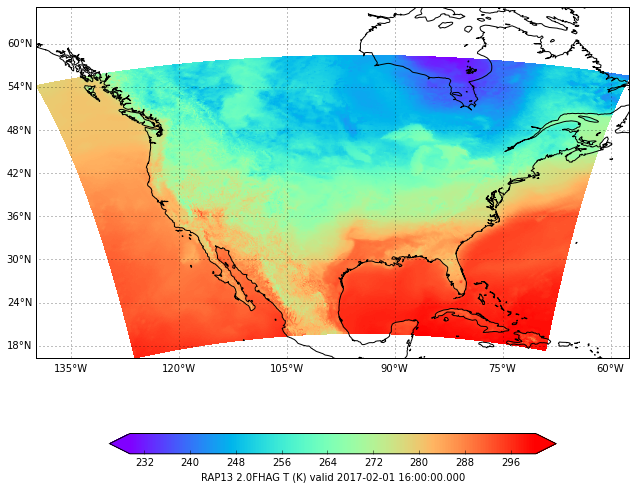

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import numpy.ma as ma
from scipy.io import loadmat
def make_map(bbox, projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(16, 9),
                           subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

cmap = plt.get_cmap('rainbow')
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
fig, ax = make_map(bbox=bbox)
cs = ax.pcolormesh(lons, lats, data, cmap=cmap)
cbar = fig.colorbar(cs, extend='both', shrink=0.5, orientation='horizontal')
cbar.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime().getRefTime()))

## 2. contourf

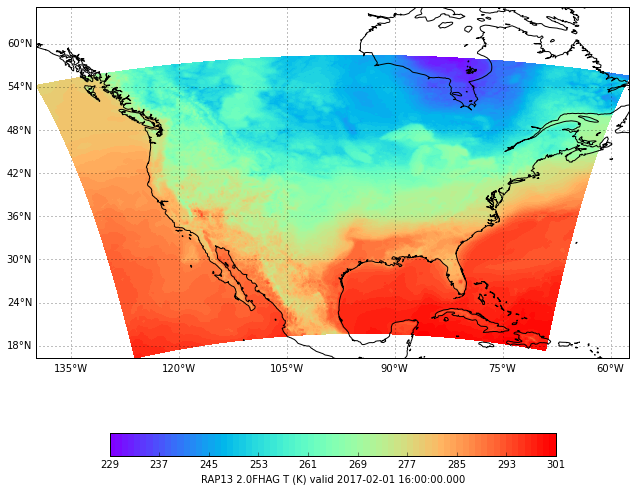

In [16]:
fig2, ax2 = make_map(bbox=bbox)
cs2 = ax2.contourf(lons, lats, data, 80, cmap=cmap,
                  vmin=data.min(), vmax=data.max())
cbar2 = fig2.colorbar(cs2, extend='both', shrink=0.5, orientation='horizontal')
cbar2.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime().getRefTime()))